In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB

In [44]:
df = pd.read_csv('XRP_Data.csv')
df.head()

,Date,Positive Sentiment Averaged,Negative Sentiment Averaged,Overall Sentiment Averaged,Positive Sentiment Summed,Negative Sentiment Summed,Overall Sentiment Summed,Positive Sentiment RMS,Negative Sentiment RMS,Overall Sentiment RMS,...,BTC_Vol,ETH_Change,ETH_High,ETH_Low,ETH_Open,ETH_Price,ETH_Vol,ten day percent change,thirty day percent change,binned price
0,2017-08-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,42.31,12.53,232.59,200.80,200.81,225.97,352.31,0.000000,0.000000,3
1,2017-08-02,0.176871,-0.072562,0.104308,0.176871,-0.072562,0.104308,0.176871,-0.072562,0.104308,...,23.76,-3.53,229.70,215.00,225.97,218.00,159.47,0.024648,0.024648,3
2,2017-08-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,16.86,3.11,228.20,217.07,218.00,224.79,96.19,0.018779,0.018779,3
3,2017-08-04,0.163616,-0.102975,0.060641,0.163616,-0.102975,0.060641,0.163616,-0.102975,0.060641,...,18.99,-1.81,228.30,218.66,224.79,220.73,83.46,0.079812,0.079812,3
4,2017-08-05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50.56,15.01,259.90,219.23,220.73,253.87,234.87,0.058099,0.058099,3


In [51]:
X = df.iloc[:,[6,11,17,20,23,26,29,30]]
X['Price'] = df.XRP_Price.shift(1)
X.Price.at[0] = 0.1786
X.head()

/home/scott/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Overall Sentiment Summed,XRP_High,BTC_High,BTC_Price,ETH_High,ETH_Price,thirty day percent change,binned price,Price
0,0.000000,0.1850,2901.6,2731.2,232.59,225.97,0.000000,3,0.1786
1,0.104308,0.1800,2757.8,2702.0,229.70,218.00,0.024648,3,0.1704
2,0.000000,0.1772,2813.0,2790.3,228.20,224.79,0.018779,3,0.1746
3,0.060641,0.1780,2874.8,2860.0,228.30,220.73,0.079812,3,0.1736
4,0.000000,0.1920,3331.9,3256.4,259.90,253.87,0.058099,3,0.1840


In [19]:
y = df.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: binned price, dtype: int64

In [52]:
scaler = MinMaxScaler()
scaler.fit(X.values)
data = scaler.transform(X.values)
df2 = pd.DataFrame(data, columns = X.columns)

In [53]:
df2.head()

,Overall Sentiment Summed,XRP_High,BTC_High,BTC_Price,ETH_High,ETH_Price,thirty day percent change,binned price,Price
0,0.238905,0.007758,0.008393,0.001771,0.003674,0.006859,0.079451,0.061224,0.009971
1,0.266786,0.006155,0.000000,0.000000,0.001255,0.000000,0.081409,0.061224,0.006839
2,0.238905,0.005258,0.003222,0.005356,0.000000,0.005843,0.080943,0.061224,0.008443
3,0.255114,0.005514,0.006829,0.009584,0.000084,0.002349,0.085792,0.061224,0.008061
4,0.238905,0.010003,0.033508,0.033631,0.026527,0.030869,0.084067,0.061224,0.012034


In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.6, test_size = 0.4, random_state = 42)

In [79]:
param_grid = {'C':[0.001, 0.1, 1, 10]}
clf = LogisticRegression()
clf_cv = GridSearchCV(clf, param_grid, cv = 5)
clf_cv.fit(X_train, y_train)
estimator = clf_cv.best_estimator_
y_predicted = estimator.predict(X_test)
score = accuracy_score(y_predicted, y_test)

/home/scott/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


In [80]:
score

0.3431372549019608

In [81]:
clf = GaussianNB()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
score = accuracy_score(y_train, y_pred)

In [82]:
score

0.7615894039735099

In [83]:
ytest_pred = clf.predict(X_test)
score = accuracy_score(y_test, ytest_pred)

In [84]:
score

0.5686274509803921

In [85]:
from sklearn.naive_bayes import BernoulliNB

In [86]:
clf = BernoulliNB()

clf.fit(X_train, y_train)
y_pred = clf.predict(X_train)
score = accuracy_score(y_train, y_pred)

In [87]:
score

0.32450331125827814

In [88]:
from sklearn.cluster import KMeans

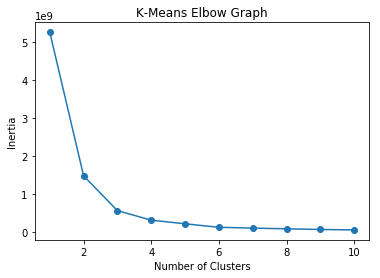

In [92]:
ks = range(1,11)
inertias = []
for k in ks:
    cluster = KMeans(n_clusters=k)
    cluster.fit(X_train)
    inertias.append(cluster.inertia_)
    
    
fig = plt.figure()
plt.plot(ks, inertias, marker = 'o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('K-Means Elbow Graph')
plt.show()

In [93]:
clf = KMeans(n_clusters=3)
clf.fit(X_train)
y_pred = clf.predict(X_train)
accuracy_score(y_train,y_pred)

0.13245033112582782